In [1]:
# You are tasked with designing a Convolutional Neural Network for a simple image classification problem. (cat vs dog)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from glob import glob
import numpy as np

# Dataset: https://www.kaggle.com/datasets/karakaggle/kaggle-cat-vs-dog-dataset?resource=download (cat vs dog)

In [2]:
def preprocess_image(image_path, target_size=(32, 32)):
    try:
        image = tf.io.read_file(image_path)
        image = tf.image.decode_image(image, channels=3)  # RGB with values in [0, 255]
        image = tf.image.resize(image, target_size)
        if image.shape[0] == 1:  
            image = tf.squeeze(image, axis=0)
        image = image / 255.0  # Normalise to [0, 1]
        return image
    except Exception as e:
        print(f"Error processing image at {image_path}: {e}")
        return None

def preprocess_dataset(image_paths, labels, target_size=(32, 32)):
    images = [preprocess_image(path, target_size) for path in image_paths]
    return images, labels


In [3]:
images = []
labels = []

for i in glob("PetImages/Cat/*.jpg"):
    images.append(i)
    labels.append(0)

for i in glob("PetImages/Dog/*.jpg"):
    images.append(i)
    labels.append(1)


In [4]:
len(images), len(labels)

(24959, 24959)

In [5]:
images, labels = preprocess_dataset(images, labels)

len(images), len(labels)

Error processing image at PetImages/Cat\4351.jpg: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input size should match (header_size + row_size * abs_height) but they differ by 2 [Op:DecodeImage] name: 
Error processing image at PetImages/Dog\11233.jpg: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Number of channels inherent in the image must be 1, 3 or 4, was 2 [Op:DecodeImage] name: 
Error processing image at PetImages/Dog\11912.jpg: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Number of channels inherent in the image must be 1, 3 or 4, was 2 [Op:DecodeImage] name: 
Error processing image at PetImages/Dog\2317.jpg: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Number of channels inherent in the image must be 1, 3 or 4, was 2 [Op:DecodeImage] name: 
Error processing image at PetImages/Dog\2494.jpg:

(24959, 24959)

In [16]:
# Remove None values and ensure all images have the correct shape
valid_images = []
valid_labels = []

for img, label in zip(images, labels):
    if isinstance(img, tf.Tensor) and img.shape == (32, 32, 3):
        valid_images.append(img)
        valid_labels.append(label)
    elif isinstance(img, type(None)):
        print(f"None value found, skipping.")
    else:
        print(f"Invalid type or shape: {type(img)}, shape: {img.shape if isinstance(img, tf.Tensor) else 'N/A'}")

images = valid_images
labels = valid_labels

None value found, skipping.
None value found, skipping.
None value found, skipping.
None value found, skipping.
None value found, skipping.


In [ ]:
images = np.array(images)

In [19]:
# One-hot encode the labels
labels = to_categorical(labels)

labels.shape


(24948, 2)

In [20]:
images.shape, labels.shape

((24948, 32, 32, 3), (24948, 2))

In [21]:
# split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [22]:
len(X_train), len(y_train), len(X_test), len(y_test)

(19958, 19958, 4990, 4990)

In [23]:
# Create the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5), # Regularisation to prevent overfitting
    Dense(2, activation='softmax')
])

model.summary()

d:\source\PyCharmProject\veunex\learning\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,050 (476.76 KB)

 Trainable params: 122,050 (476.76 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,050 (476.76 KB)

 Trainable params: 122,050 (476.76 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
hisotry = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5567 - loss: 0.6807 - val_accuracy: 0.6373 - val_loss: 0.6331
Epoch 2/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6781 - loss: 0.6017 - val_accuracy: 0.7122 - val_loss: 0.5619
Epoch 3/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7433 - loss: 0.5204 - val_accuracy: 0.7548 - val_loss: 0.5063
Epoch 4/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7758 - loss: 0.4747 - val_accuracy: 0.7625 - val_loss: 0.4829
Epoch 5/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8075 - loss: 0.4354 - val_accuracy: 0.7791 - val_loss: 0.4621
Epoch 6/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8144 - loss: 0.4092 - val_accuracy: 0.7693 - val_loss: 0.4856
Epoch 7/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8337 - loss: 0.3751 - val_accuracy: 0.7883 - val_loss: 0.4476
Epoch 8/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8539 - loss: 0.3432 - val_accu

In [26]:
# Evaulate the model
model.evaluate(X_test, y_test)

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7864 - loss: 1.9047


[1.886951208114624, 0.7901803851127625]

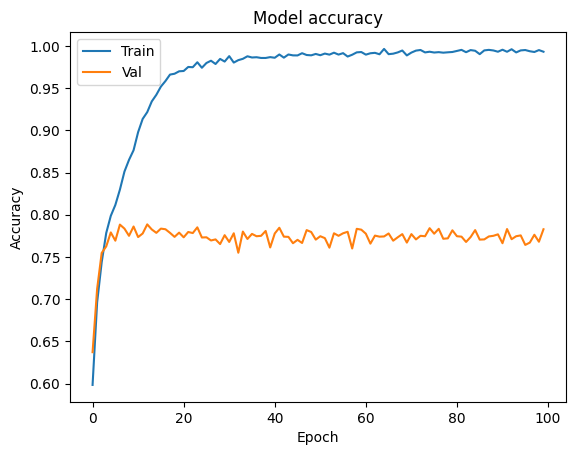

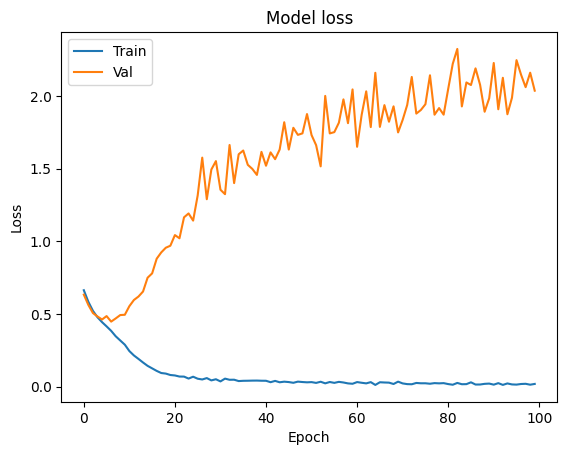

In [28]:
# fix my typo
history = hisotry

# plot the training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


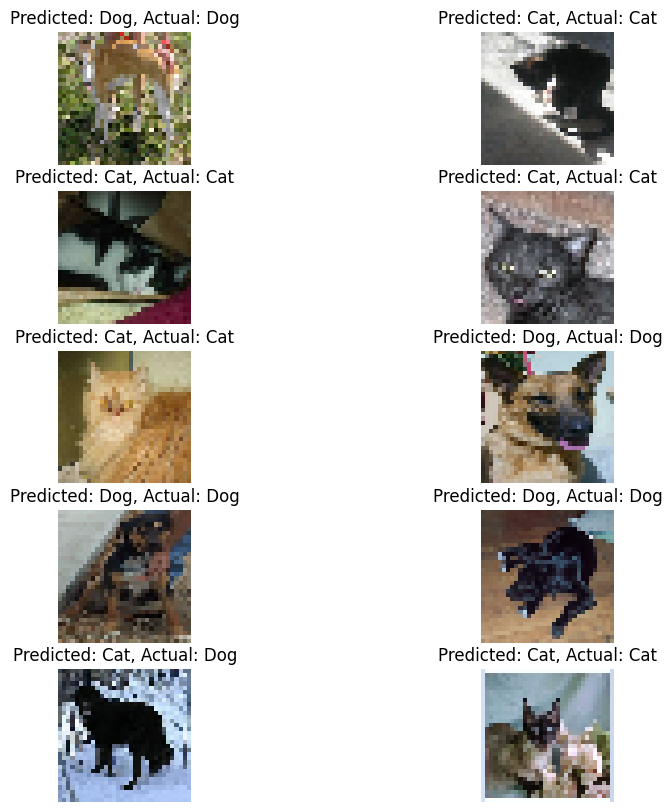

In [33]:
# predict on a batch of images

predictions = model.predict(X_test[:10])

predictions

# Convert the one-hot encoded labels back to integers
y_test_int = np.argmax(y_test[:10], axis=1)

y_test_int

map_label = {0: 'Cat', 1: 'Dog'}

# plot the images and their predicted labels
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {map_label[np.argmax(predictions[i])]}, Actual: {map_label[y_test_int[i]]}")
    plt.axis('off')

In [35]:
# Save the model
model.save('cat_dog_classifier.keras')